In [48]:
import numpy as np
from sklearn import linear_model, datasets
import json

In [49]:
def RANSAC(observed_data,threshold):
    X,y=observed_data
    #Model Fitting
    from sklearn.linear_model import RANSACRegressor
    model = RANSACRegressor()
    model.fit(X,y)
    newX= []
    newy= []
    #Defining Inlier mask 
    mask = model.inlier_mask_
    print(mask)
    for i in range (len(mask)):
        if mask[i]== True:
            newX.append(X[i])
            newy.append(y[i])
            
    #Keep the following code unchanged
    return (newX,newy)


In [50]:
#Use the following code to test your RANSAC implementation. 

with open('code-input.json','r') as infile:
    indata=json.load(infile)

X=np.array(indata['X']) 
y=np.array(indata['y'])   

newX,newy=RANSAC((X,y),0.01)

model = linear_model.LinearRegression()
model.fit(newX, newy)
yhat=model.predict(newX)

#Prediction on original data 
model2 =linear_model.LinearRegression()
model2.fit(X, y)
y_pred=model2.predict(X)

m_coef=model.coef_
m_intercept=model.intercept_

# keep the jason.dump part unchanged
outdata={'coef':m_coef.tolist(),'intercept':m_intercept.tolist()}
with open('output.json','w') as outfile:
    json.dump(outdata,outfile)

# You must have a plot to present the data and compare regression result with and without RANSAC


[False False False ...  True  True  True]


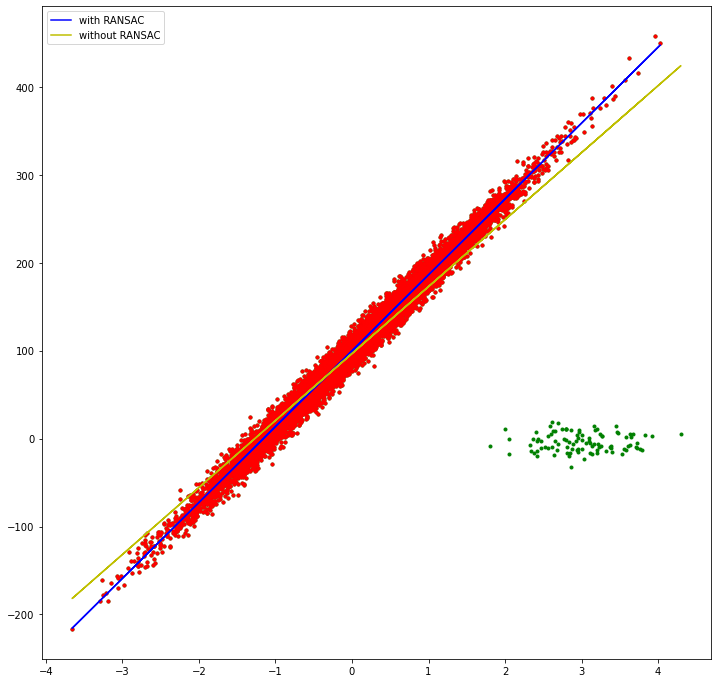

In [51]:
#Visulization of the data with and without RANSAC
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.scatter(X,y,color='green',marker='.')
plt.scatter(newX,newy,color='r',marker='.')
plt.plot(newX,yhat,color='b',linestyle='-',label='with RANSAC')
plt.plot(X,y_pred,color='y',linestyle='-',label='without RANSAC')

plt.legend()
plt.show()